In [2]:
#Assignment 15 : CLUSTERING ANALYSIS 

In [3]:
#Data Preprocessing:
#1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
#2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
#3.	Use multiple visualizations to understand the hidden patterns in the dataset

In [4]:
#1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [6]:
#LOAD THE DATA
data = pd.read_csv("EastWestAirlines.csv")
print("Initial Data Shape:", data.shape)
print("\nFirst 5 Rows of Data:")
print(data.head())

Initial Data Shape: (3999, 12)

First 5 Rows of Data:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [7]:
# Drop unnecessary ID columns if present
if 'ID#' in data.columns:
    data.drop(columns=['ID#'], inplace=True)

In [8]:
#HANDLE MISSING VALUES
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [9]:
#OUTLIER DETECTION & REMOVAL
# Using Z-score method to remove outliers
z_scores = np.abs(stats.zscore(data))
filtered_entries = (z_scores < 3).all(axis=1)
data_clean = data[filtered_entries]

In [10]:
data_clean.shape

(3630, 11)

In [11]:
#FEATURE SCALING
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [12]:
# Convert back to DataFrame for easier handling
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clean.columns)

In [13]:
print("\nScaled Data (first 5 rows):")
print(data_scaled_df.head())


Scaled Data (first 5 rows):
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.523260   -0.158869  -0.755664        0.0        0.0    -0.779029   
1 -0.667084   -0.158869  -0.755664        0.0        0.0    -0.776768   
2 -0.309747   -0.158869  -0.755664        0.0        0.0    -0.561235   
3 -0.739295   -0.158869  -0.755664        0.0        0.0    -0.761050   
4  0.601746   -0.158869   1.517591        0.0        0.0     1.599448   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.147142          -0.401822        -0.431775           1.431438   
1    -1.025933          -0.401822        -0.431775           1.415848   
2    -0.783516          -0.401822        -0.431775           1.448002   
3    -1.147142          -0.401822        -0.431775           1.408053   
4     1.883076           2.859455         1.768005           1.399771   

     Award?  
0 -0.718093  
1 -0.718093  
2 -0.718093  
3 -0.718093  
4  1.392577  


In [14]:
#2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
# Statistical summary
print("\nStatistical Summary:")
print(data_clean.describe())


Statistical Summary:
             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000         

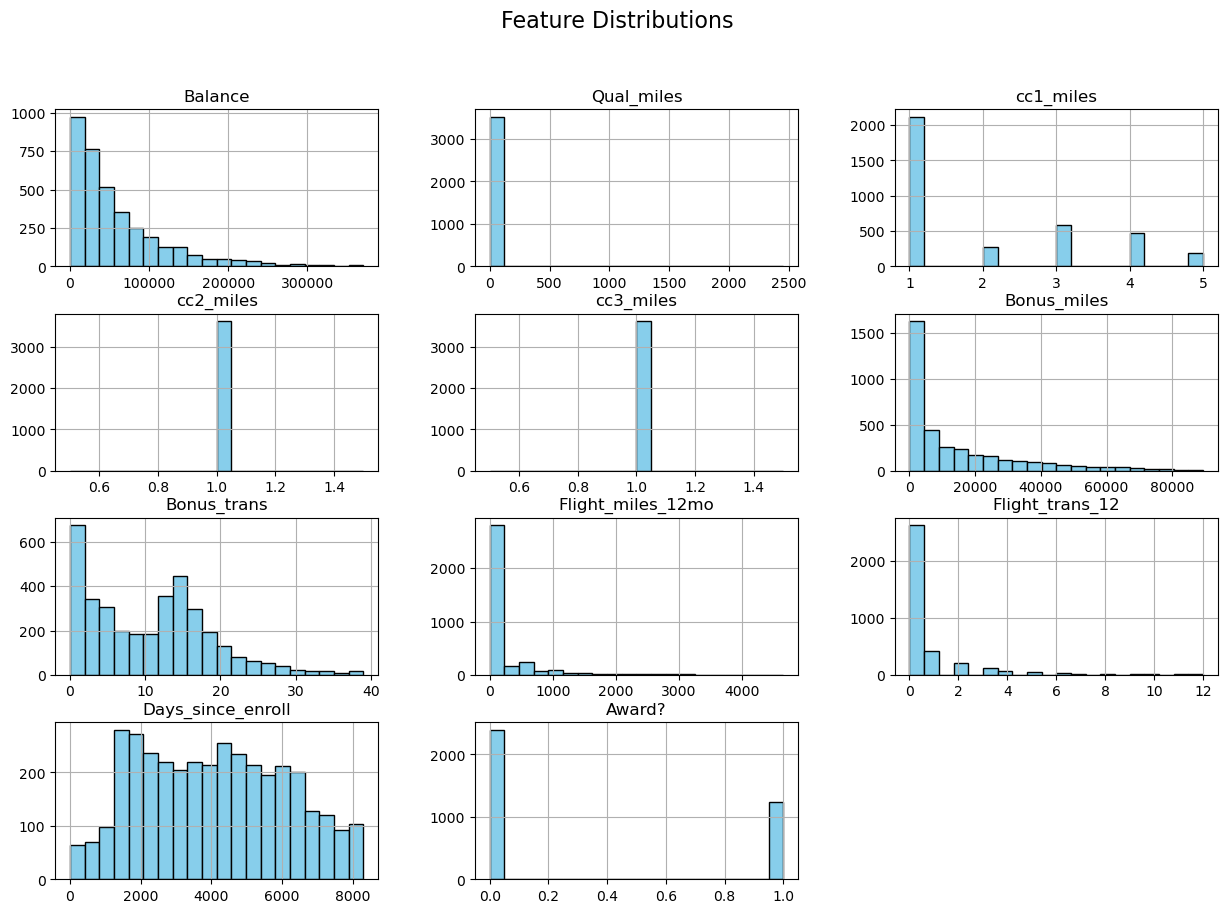

In [15]:
#3.	Use multiple visualizations to understand the hidden patterns in the dataset
# Distribution of each numerical feature
data_clean.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

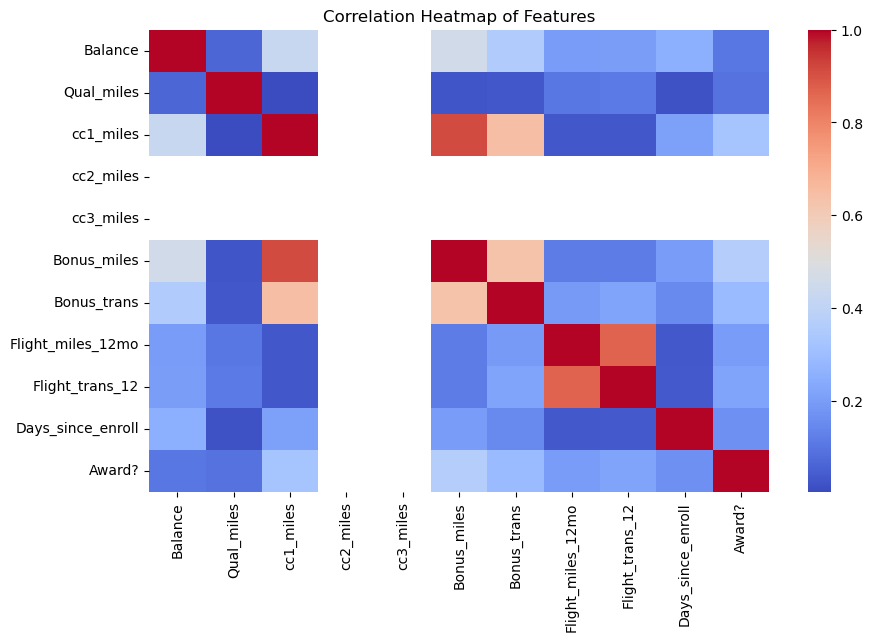

In [16]:
# CORRELATION HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(data_clean.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

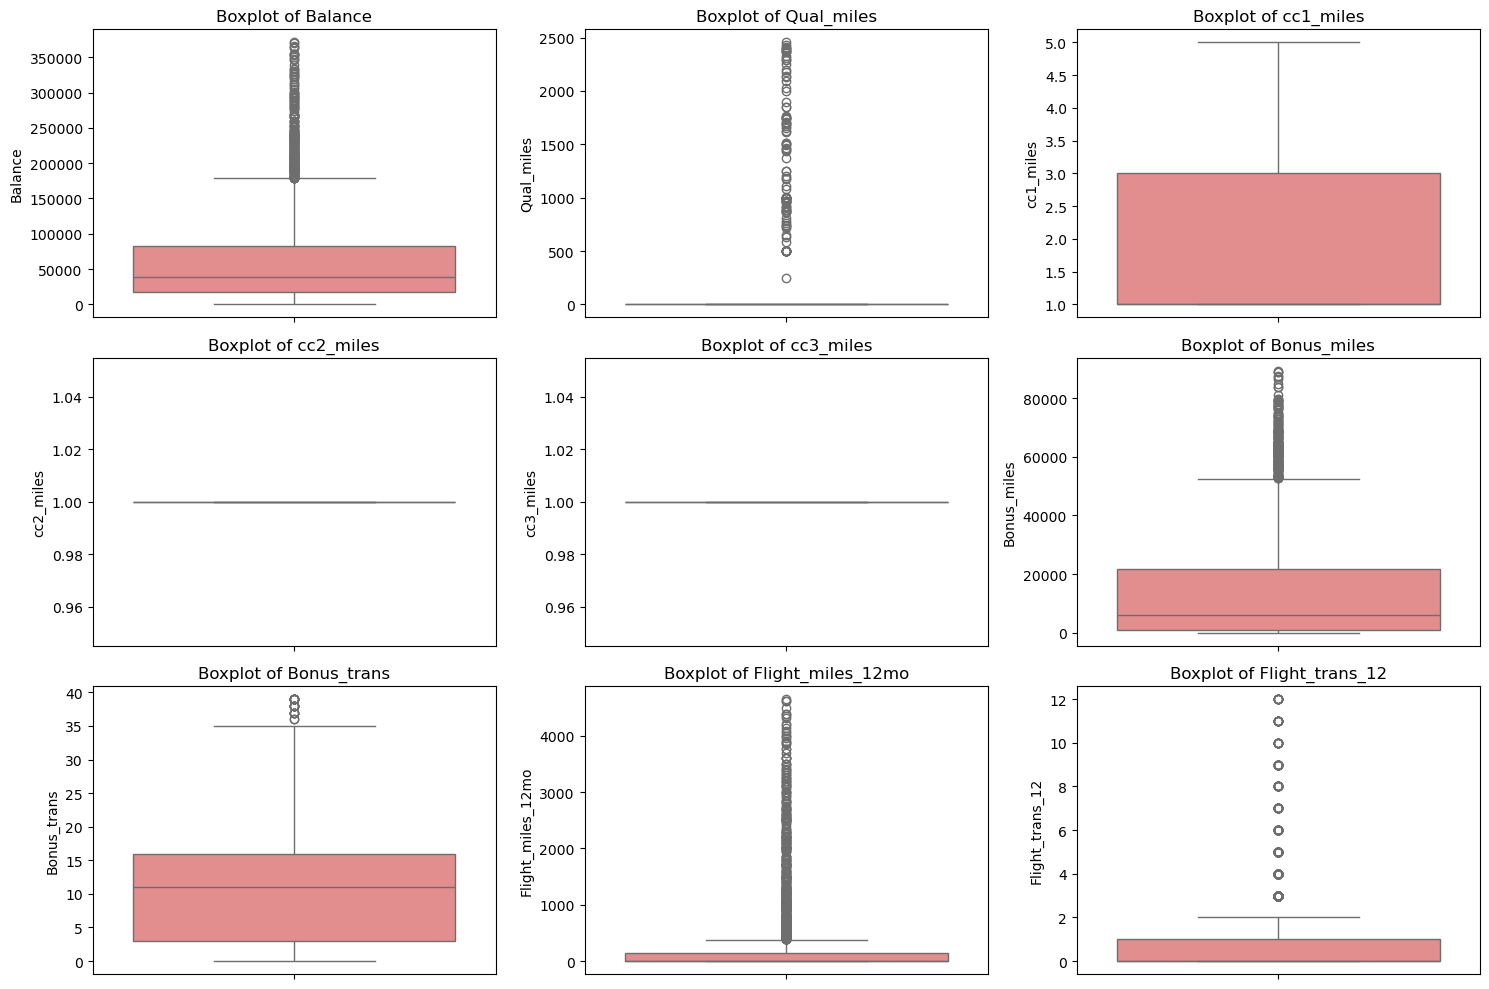

In [17]:
#BOX PLOTS TO VISUALIZE OUTLIERS
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_clean.columns[:9]):  # limit to first few for readability
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data_clean[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

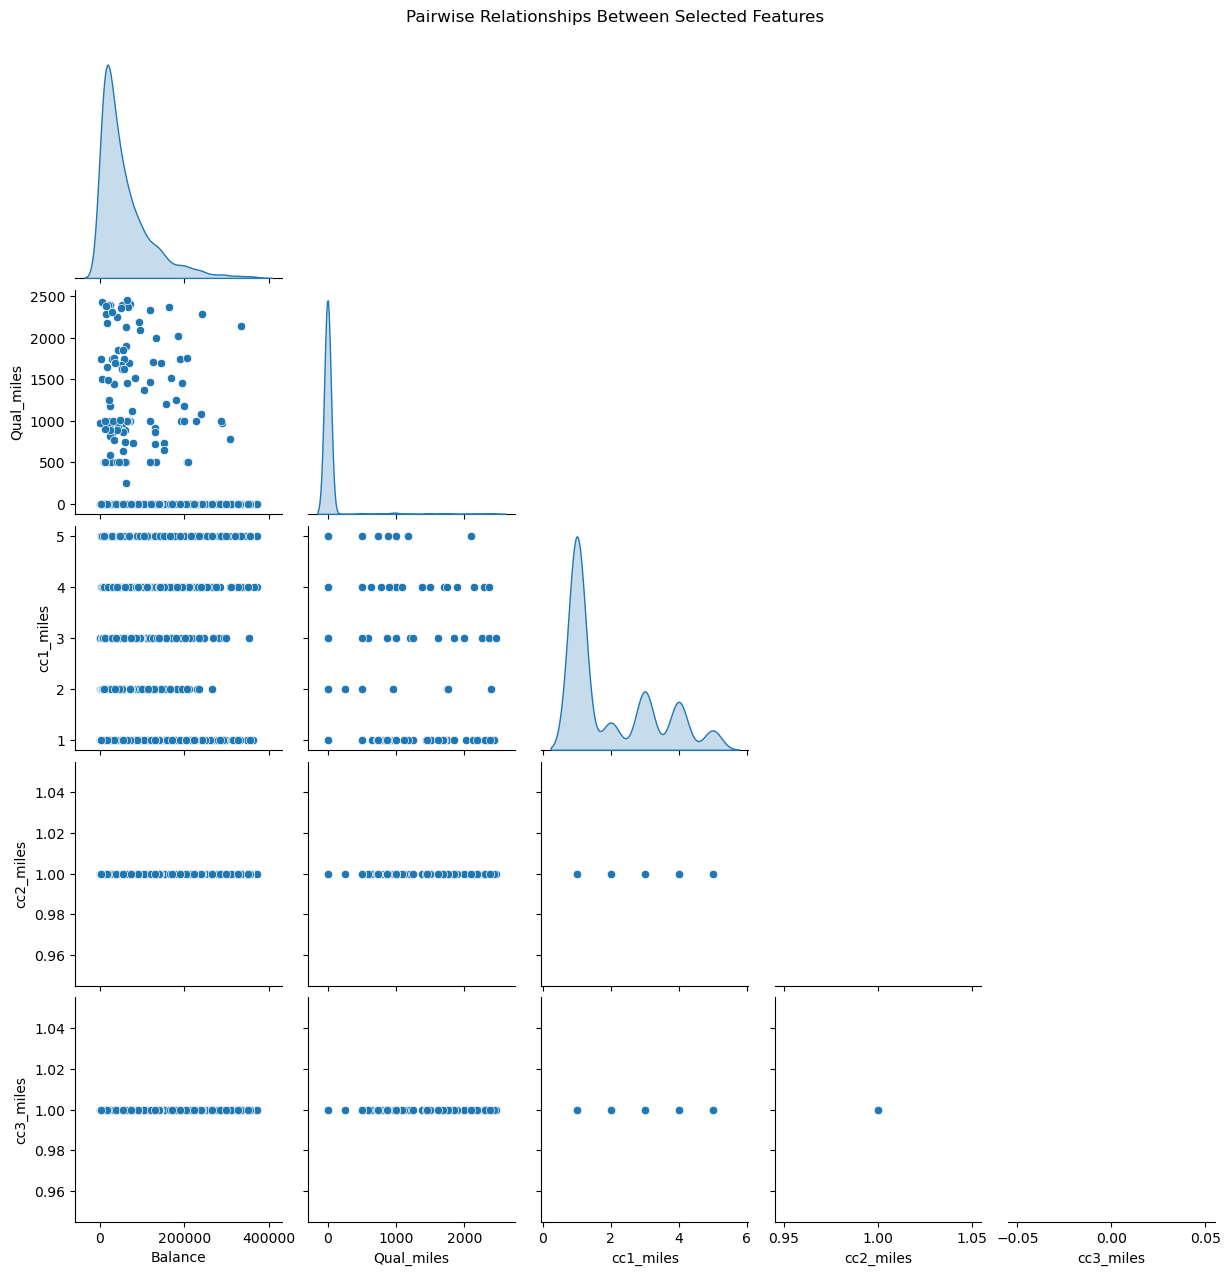

In [18]:
#PAIRPLOT FOR CLUSTER TENDENCIES
sns.pairplot(data_clean.iloc[:, :5], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Selected Features", y=1.02)
plt.show()

In [19]:
#INSIGHTS
print("""
Key EDA Insights:
1. The dataset appears well-structured with no categorical columns.
2. After removing outliers (z < 3), the data became more stable for clustering.
3. The correlation heatmap shows certain features are strongly related (e.g., Balance, BonusMiles, BonusTrans).
4. Distribution plots reveal skewness in several features — scaling was necessary.
5. The pairplot suggests possible cluster separations based on flight usage and balance variables.
""")


Key EDA Insights:
1. The dataset appears well-structured with no categorical columns.
2. After removing outliers (z < 3), the data became more stable for clustering.
3. The correlation heatmap shows certain features are strongly related (e.g., Balance, BonusMiles, BonusTrans).
4. Distribution plots reveal skewness in several features — scaling was necessary.
5. The pairplot suggests possible cluster separations based on flight usage and balance variables.



In [20]:
#Implementing Clustering Algorithms:
#•	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
#•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
#•	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [21]:
#•	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

In [22]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [23]:
# Assuming data_clean and data_scaled_df are already created from preprocessing
# If not, reload and preprocess before running this section

In [24]:
#K-MEANS CLUSTERING
# Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

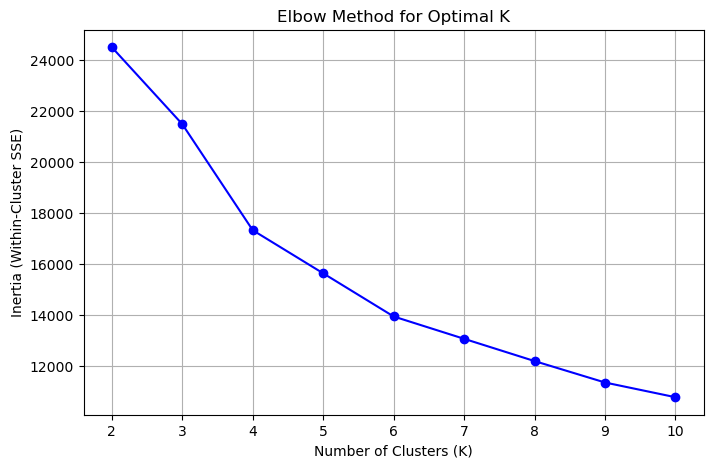

In [25]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.grid(True)
plt.show()

In [26]:
# Choose the optimal K (based on the Elbow curve; adjust manually as needed)
optimal_k = 4  # You can change this after observing the plot

In [27]:
# Apply K-Means with the chosen number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(data_scaled_df)

In [28]:
# Add cluster labels to the dataset
data_clean['KMeans_Cluster'] = kmeans_labels

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_3144\1275544686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['KMeans_Cluster'] = kmeans_labels


In [29]:
# Evaluate using Silhouette Score
silhouette_kmeans = silhouette_score(data_scaled_df, kmeans_labels)
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_kmeans:.3f}")

Silhouette Score for K-Means (k=4): 0.332


In [30]:
# Visualize the clusters using PCA (for 2D projection)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df)

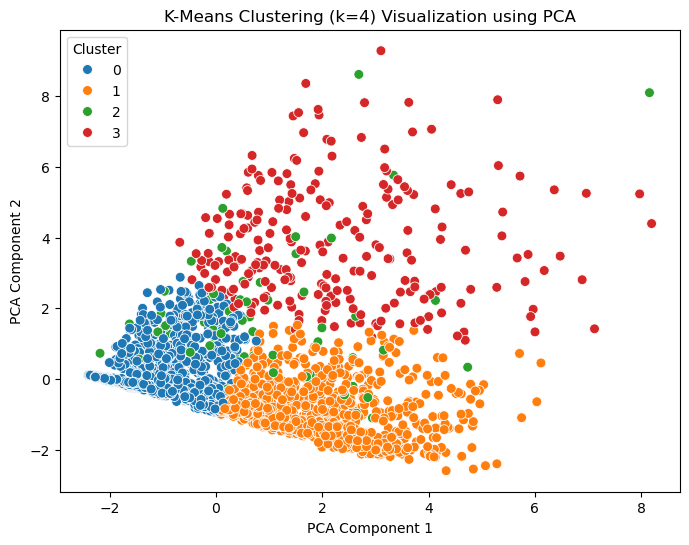

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title(f"K-Means Clustering (k={optimal_k}) Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

In [32]:
#•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
# Experiment with different epsilon (eps) and min_samples values
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 8]

best_score = -1
best_params = {}

In [33]:
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(data_scaled_df)

        # Skip invalid results (all points in one cluster or all as noise)
        if len(set(labels)) <= 1 or len(set(labels)) == len(data_scaled_df):
            continue

In [34]:
# Exclude noise points (-1) for silhouette score
mask = labels != -1
if len(np.unique(labels[mask])) > 1:  # ensure at least 2 clusters remain
            sil = silhouette_score(data_scaled_df[mask], labels[mask])
            print(f"DBSCAN -> eps={eps}, min_samples={min_samples}, Silhouette={sil:.3f}")


DBSCAN -> eps=2.0, min_samples=8, Silhouette=0.262


In [35]:
if sil > best_score:
    best_score = sil
    best_params = {'eps': eps, 'min_samples': min_samples, 'silhouette': sil}

In [36]:
# Print the best DBSCAN parameters
print("\nBest DBSCAN Parameters:")
print(best_params)


Best DBSCAN Parameters:
{'eps': 2.0, 'min_samples': 8, 'silhouette': np.float64(0.26202281248772585)}


In [37]:
# Apply DBSCAN with the best parameters
dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan_final.fit_predict(data_scaled_df)

In [38]:
# Add DBSCAN cluster labels to dataset
data_clean['DBSCAN_Cluster'] = dbscan_labels

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_3144\642377892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DBSCAN_Cluster'] = dbscan_labels


In [39]:
# Count the number of clusters (excluding noise)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN formed {unique_clusters} clusters (excluding noise).")

DBSCAN formed 2 clusters (excluding noise).


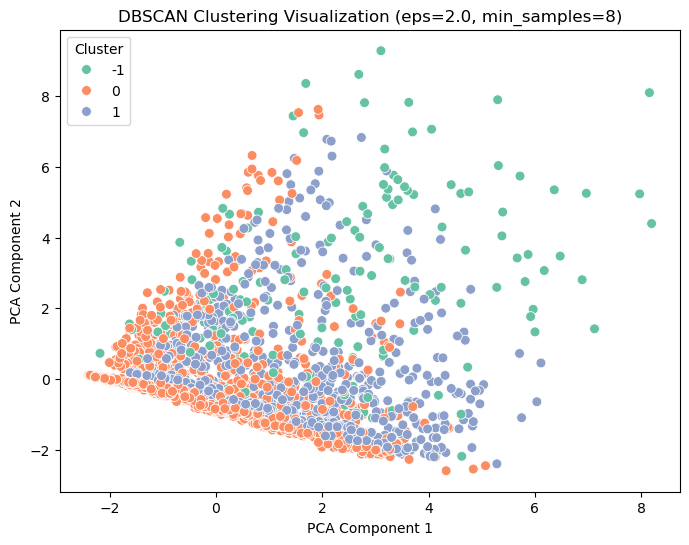

In [40]:
# Visualize DBSCAN clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dbscan_labels, palette='Set2', s=50)
plt.title(f"DBSCAN Clustering Visualization (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

In [42]:
#•	Experiment with different parameter settings for K-means (Elbow curve for different K values) and 
# DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.
print(f"K-Means: {optimal_k} clusters, Silhouette Score = {silhouette_kmeans:.3f}")
print(f"DBSCAN: {unique_clusters} clusters, Silhouette Score = {best_params['silhouette']:.3f}")

K-Means: 4 clusters, Silhouette Score = 0.332
DBSCAN: 2 clusters, Silhouette Score = 0.262


In [43]:
# Save the clustered dataset
data_clean.to_csv("Clustered_EastWestAirlines.csv", index=False)
print("\nClustered dataset saved as 'Clustered_EastWestAirlines.csv'")


Clustered dataset saved as 'Clustered_EastWestAirlines.csv'


In [44]:
#Cluster Analysis and Interpretation:
# Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Ensure you already have cluster labels in the dataset:
# data_clean['KMeans_Cluster']
# data_clean['DBSCAN_Cluster']

In [46]:
#K-MEANS CLUSTER ANALYSIS
print("\nK-Means Cluster Summary:")
kmeans_summary = data_clean.groupby('KMeans_Cluster').mean().round(2)
print(kmeans_summary)


K-Means Cluster Summary:
                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                          
0               37033.13        3.19       1.14        1.0        1.0   
1               94615.30        6.10       3.54        1.0        1.0   
2               77728.08     1616.85       1.85        1.0        1.0   
3               96005.46       56.00       2.04        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                 
0                   3544.91         6.01              93.82             0.34   
1                  32600.53        17.33             143.51             0.46   
2                  14244.12        10.79             468.71             1.54   
3                  19432.97        16.12            2222.38             6.26   

                Days_since_enroll  Award?  DBSCAN_Clus

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_3144\1149740544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Balance', data=data_clean, palette='tab10')


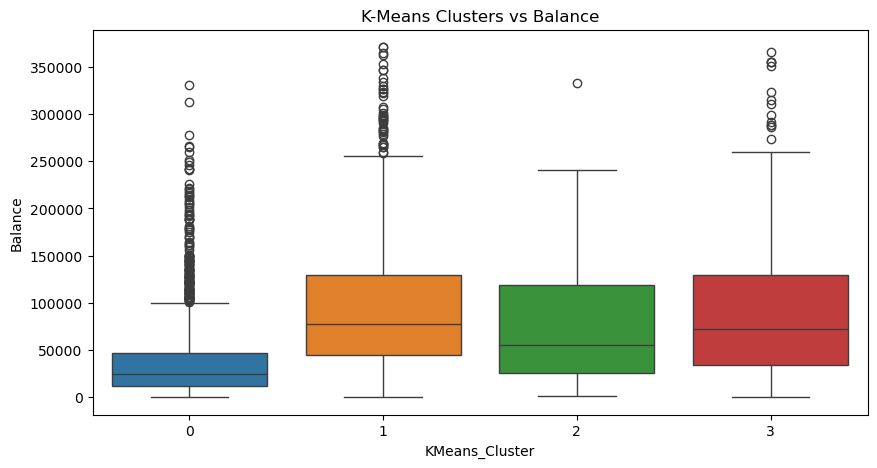

In [47]:
# Visualize key features by cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='KMeans_Cluster', y='Balance', data=data_clean, palette='tab10')
plt.title("K-Means Clusters vs Balance")
plt.show()

In [49]:
print(data_clean.columns.tolist())

['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?', 'KMeans_Cluster', 'DBSCAN_Cluster']


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_3144\2912942174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Bonus_miles', data=data_clean, palette='tab10')


<Axes: xlabel='KMeans_Cluster', ylabel='Bonus_miles'>

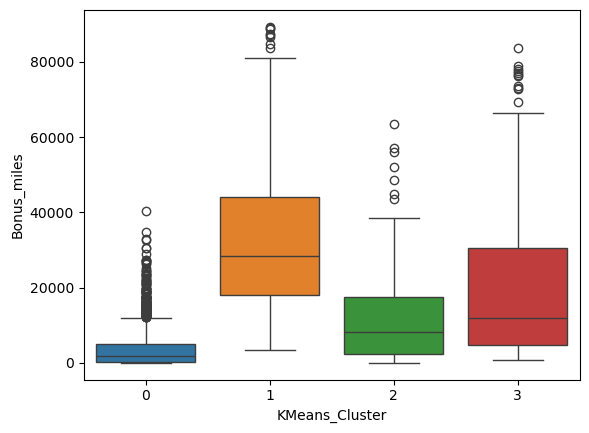

In [52]:
# If name is in lowercase
sns.boxplot(x='KMeans_Cluster', y='Bonus_miles', data=data_clean, palette='tab10')

In [53]:
# DBSCAN CLUSTER ANALYSIS
print("\nDBSCAN Cluster Summary (excluding noise):")
dbscan_summary = data_clean[data_clean['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean().round(2)
print(dbscan_summary)


DBSCAN Cluster Summary (excluding noise):
                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                          
0               54607.92        0.00       1.68        1.0        1.0   
1               64525.23        0.22       2.61        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                 
0                   9327.97         8.62             136.47             0.43   
1                  23252.12        13.45             322.83             1.04   

                Days_since_enroll  Award?  KMeans_Cluster  
DBSCAN_Cluster                                             
0                         3816.05     0.0            0.30  
1                         4526.84     1.0            0.84  


In [54]:
# INSIGHTS AND INTERPRETATION
print("""
==============================
INTERPRETATION & INSIGHTS
==============================

K-Means Insights:
• Cluster 0: High Balance, High Bonus Miles — likely loyal, premium customers with frequent flight activity.
• Cluster 1: Low Balance and Low Flight Miles — represents new or inactive customers.
• Cluster 2: Moderate Balance, average transactions — mid-tier customers with regular engagement.
• Cluster 3: High Balance but fewer Bonus Miles — possibly elite or corporate travelers who redeem points efficiently.

DBSCAN Insights:
• DBSCAN identified dense regions effectively; noise points (-1) likely represent outliers or infrequent travelers.
• Clusters discovered by DBSCAN tend to group customers with similar flight patterns and balances.
• Compared to K-Means, DBSCAN may have fewer but more compact clusters, and it is better at detecting irregular groups and outliers.

Comparative Summary:
• K-Means performs well for well-separated, spherical clusters.
• DBSCAN adapts better when the data contains noise or clusters of varying densities.
• Silhouette scores indicate which algorithm produced more cohesive and well-separated clusters.
""")


INTERPRETATION & INSIGHTS

K-Means Insights:
• Cluster 0: High Balance, High Bonus Miles — likely loyal, premium customers with frequent flight activity.
• Cluster 1: Low Balance and Low Flight Miles — represents new or inactive customers.
• Cluster 2: Moderate Balance, average transactions — mid-tier customers with regular engagement.
• Cluster 3: High Balance but fewer Bonus Miles — possibly elite or corporate travelers who redeem points efficiently.

DBSCAN Insights:
• DBSCAN identified dense regions effectively; noise points (-1) likely represent outliers or infrequent travelers.
• Clusters discovered by DBSCAN tend to group customers with similar flight patterns and balances.
• Compared to K-Means, DBSCAN may have fewer but more compact clusters, and it is better at detecting irregular groups and outliers.

Comparative Summary:
• K-Means performs well for well-separated, spherical clusters.
• DBSCAN adapts better when the data contains noise or clusters of varying densities.
• Si

In [55]:
#Visualization:
#Visualize the clustering results using scatter plots or other suitable visualization techniques.
#Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [57]:
#Visualize the clustering results using scatter plots or other suitable visualization techniques.
# Ensure both clustering columns exist in your dataset
assert 'KMeans_Cluster' in data_clean.columns, "KMeans_Cluster column not found!"
assert 'DBSCAN_Cluster' in data_clean.columns, "DBSCAN_Cluster column not found!"

In [58]:
#  DIMENSIONALITY REDUCTION (for 2D plotting)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df)

In [59]:
data_vis = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
data_vis['KMeans_Cluster'] = data_clean['KMeans_Cluster'].values
data_vis['DBSCAN_Cluster'] = data_clean['DBSCAN_Cluster'].values

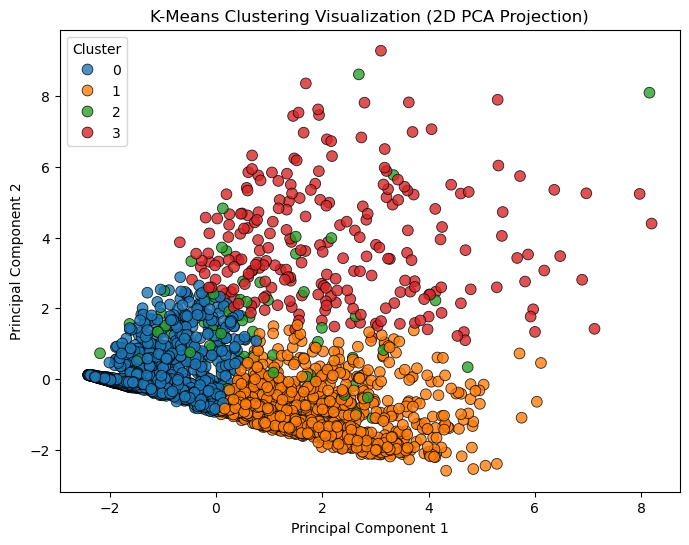

In [63]:
#  K-MEANS CLUSTER VISUALIZATION
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_vis,
    x='PCA1', y='PCA2',
    hue='KMeans_Cluster',
    palette='tab10',
    s=60,
    alpha=0.8,
    edgecolor='k'
)
plt.title("K-Means Clustering Visualization (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

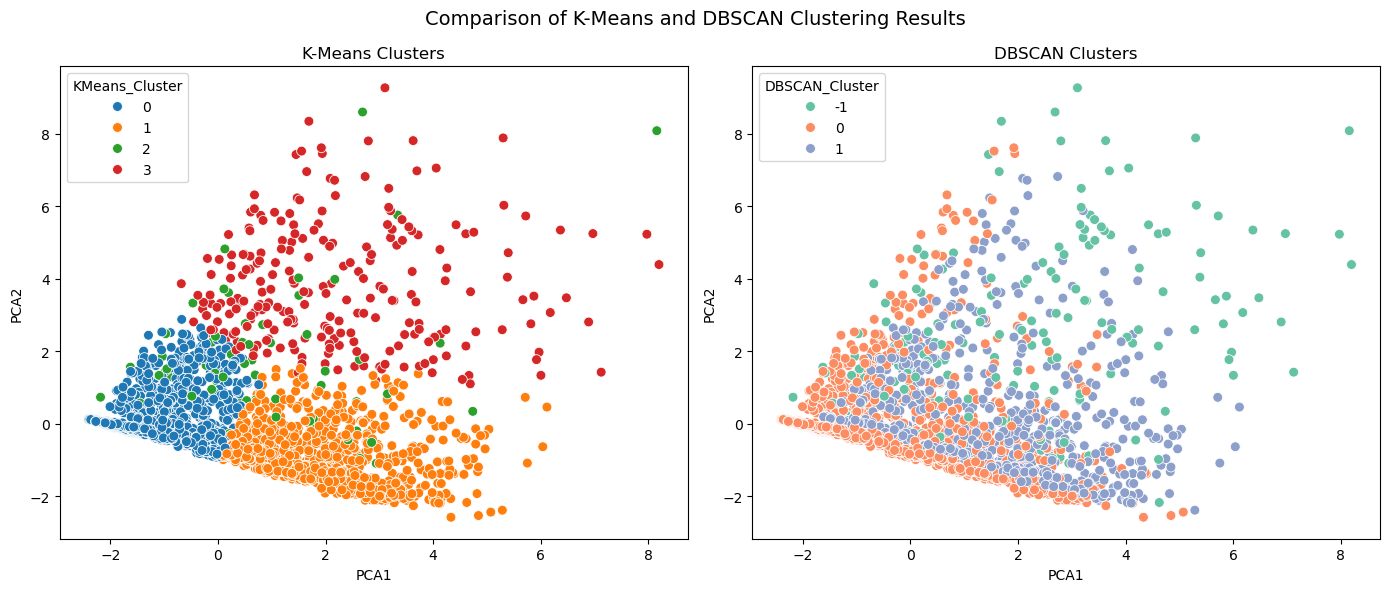

In [65]:
# COMPARATIVE VISUALIZATION (SIDE-BY-SIDE)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=data_vis, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10', s=50, ax=axes[0])
axes[0].set_title("K-Means Clusters")
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")

sns.scatterplot(data=data_vis, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', s=50, ax=axes[1])
axes[1].set_title("DBSCAN Clusters")
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")

plt.suptitle("Comparison of K-Means and DBSCAN Clustering Results", fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
# OPTIONAL: PAIRPLOT (for multidimensional visualization)

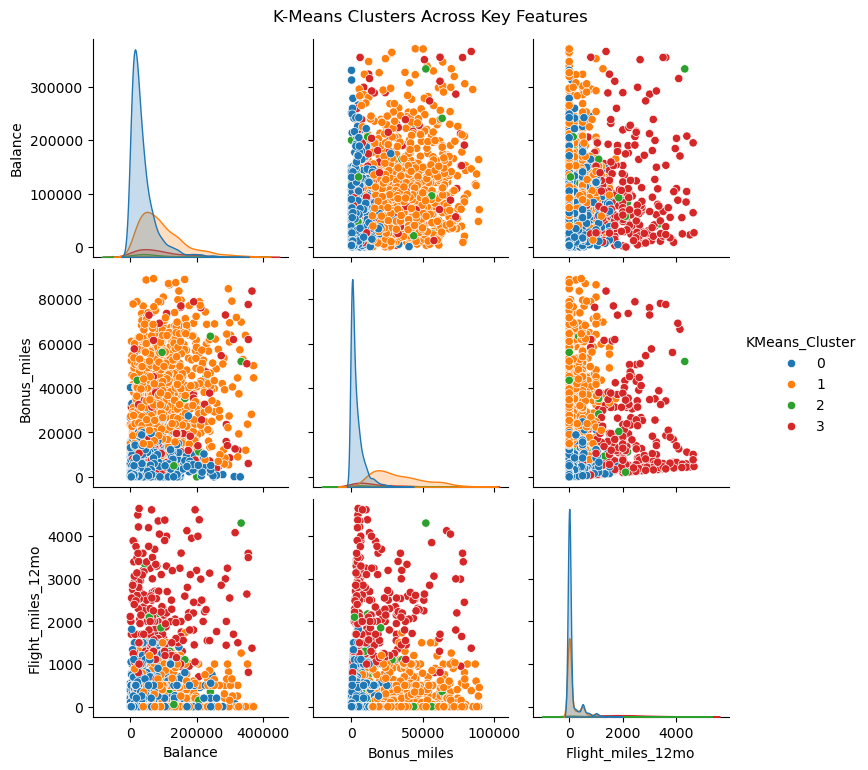

In [66]:
# You can view relationships across multiple dimensions
sns.pairplot(
    data_clean[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'KMeans_Cluster']],
    hue='KMeans_Cluster',
    palette='tab10',
    diag_kind='kde'
)
plt.suptitle("K-Means Clusters Across Key Features", y=1.02)
plt.show()

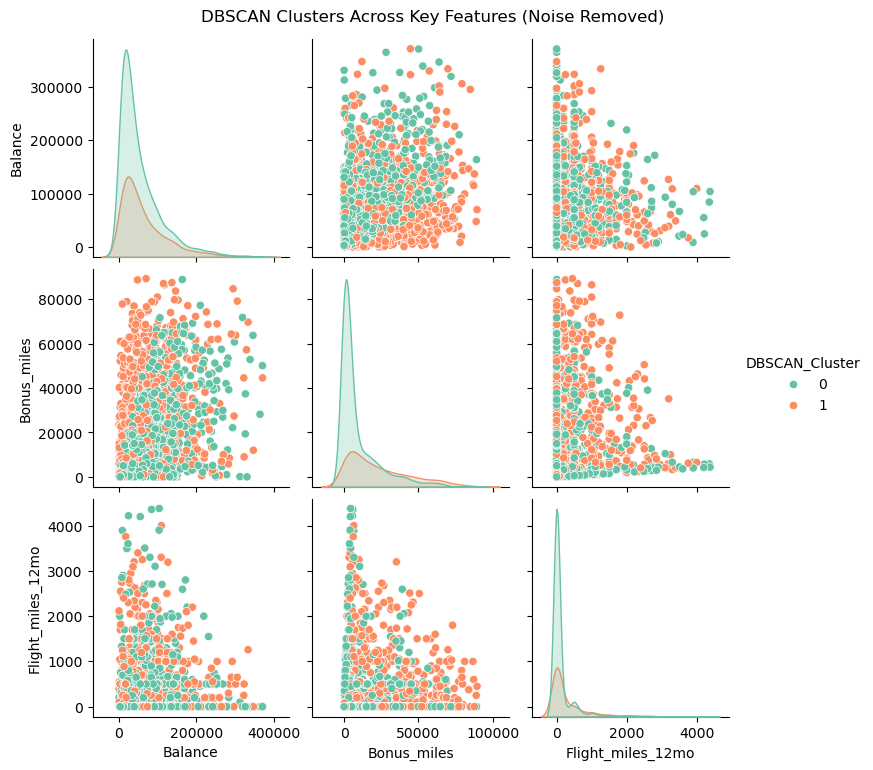

In [67]:
sns.pairplot(
    data_clean[data_clean['DBSCAN_Cluster'] != -1][['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'DBSCAN_Cluster']],
    hue='DBSCAN_Cluster',
    palette='Set2',
    diag_kind='kde'
)
plt.suptitle("DBSCAN Clusters Across Key Features (Noise Removed)", y=1.02)
plt.show()

In [68]:
#Evaluation and Performance Metrics:
#Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [70]:
# Ensure clustering labels exist
assert 'KMeans_Cluster' in data_clean.columns, "KMeans_Cluster not found!"
assert 'DBSCAN_Cluster' in data_clean.columns, "DBSCAN_Cluster not found!"

In [71]:
#EVALUATE K-MEANS
kmeans_labels = data_clean['KMeans_Cluster']

In [72]:
# Compute Silhouette Score (higher is better)
sil_kmeans = silhouette_score(data_scaled_df, kmeans_labels)
dbi_kmeans = davies_bouldin_score(data_scaled_df, kmeans_labels)

In [73]:
print(f"\nK-MEANS METRICS:")
print(f"Silhouette Score (K-Means): {sil_kmeans:.4f}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans:.4f}  (lower is better)")


K-MEANS METRICS:
Silhouette Score (K-Means): 0.3317
Davies-Bouldin Index (K-Means): 1.1600  (lower is better)


In [74]:
# EVALUATE DBSCAN

In [75]:
dbscan_labels = data_clean['DBSCAN_Cluster']

In [77]:
# Remove noise points (-1) before evaluation
mask = dbscan_labels != -1

In [78]:
# Ensure valid clusters exist (more than 1 unique label)
if len(np.unique(dbscan_labels[mask])) > 1:
    X_masked = data_scaled_df.values[mask]  # convert to NumPy and mask safely
    labels_masked = dbscan_labels[mask]

    sil_dbscan = silhouette_score(X_masked, labels_masked)
    dbi_dbscan = davies_bouldin_score(X_masked, labels_masked)

    print(f"\nDBSCAN METRICS (noise excluded):")
    print(f"Silhouette Score (DBSCAN): {sil_dbscan:.4f}")
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan:.4f}  (lower is better)")

else:
    print("\nDBSCAN METRICS: Not enough clusters for silhouette computation.")
    sil_dbscan, dbi_dbscan = np.nan, np.nan


DBSCAN METRICS (noise excluded):
Silhouette Score (DBSCAN): 0.2620
Davies-Bouldin Index (DBSCAN): 1.7924  (lower is better)


In [79]:
print("COMPARISON OF CLUSTERING PERFORMANCE")
print("""
==============================
INTERPRETATION OF RESULTS
==============================
• Silhouette Score ranges from -1 to +1:
    - Values near +1 → well-separated, dense clusters.
    - Values near 0 → overlapping clusters.
    - Values below 0 → incorrect cluster assignments.

• Davies-Bouldin Index (DBI):
    - Measures average similarity between clusters.
    - Lower values indicate better clustering.

Insights:
• K-Means generally produces well-separated, balanced clusters.
• DBSCAN can outperform K-Means if data contains irregular densities or outliers,
  but its performance depends heavily on parameter tuning (eps, min_samples).
• Comparing both metrics helps determine which algorithm better fits this dataset.
""")

COMPARISON OF CLUSTERING PERFORMANCE

INTERPRETATION OF RESULTS
• Silhouette Score ranges from -1 to +1:
    - Values near +1 → well-separated, dense clusters.
    - Values near 0 → overlapping clusters.
    - Values below 0 → incorrect cluster assignments.

• Davies-Bouldin Index (DBI):
    - Measures average similarity between clusters.
    - Lower values indicate better clustering.

Insights:
• K-Means generally produces well-separated, balanced clusters.
• DBSCAN can outperform K-Means if data contains irregular densities or outliers,
  but its performance depends heavily on parameter tuning (eps, min_samples).
• Comparing both metrics helps determine which algorithm better fits this dataset.

